# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
from datetime import datetime

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
query_url = f"{url}appid={api_key}&units={units}&q="
city_name = []
i = 0
j = 1
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    if i < 50:
        try:
            name = response['name']
            print(f"Processing Record {i} of Set {j} | {name}")
            city_name.append(name)
            i = i+1
        except (KeyError, IndexError):
            print("City not found. Skipping...") 
        
    else:

        try:
            name = response['name']
            i = 0
            j = j+1
            print(f"Processing Record {i} of Set {j} | {name}")
            city_name.append(name)
            i = 1
        except (KeyError, IndexError):
            print("City not found. Skipping...") 
    time.sleep(1)
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

City not found. Skipping...
Processing Record 0 of Set 1 | Albany
Processing Record 1 of Set 1 | Moche
Processing Record 2 of Set 1 | Dikson
Processing Record 3 of Set 1 | Usinsk
Processing Record 4 of Set 1 | Puerto Ayora
Processing Record 5 of Set 1 | Khatanga
Processing Record 6 of Set 1 | Port Alfred
Processing Record 7 of Set 1 | Rikitea
Processing Record 8 of Set 1 | Busselton
Processing Record 9 of Set 1 | Astoria
Processing Record 10 of Set 1 | Winnemucca
Processing Record 11 of Set 1 | Kodiak
Processing Record 12 of Set 1 | Cape Town
Processing Record 13 of Set 1 | Ushuaia
Processing Record 14 of Set 1 | Bathsheba
Processing Record 15 of Set 1 | Leningradskiy
Processing Record 16 of Set 1 | Saint Anthony
Processing Record 17 of Set 1 | Palmer
Processing Record 18 of Set 1 | Kutum
Processing Record 19 of Set 1 | Dingle
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 | Punta Arenas
Processing Record 21 of Set 1 | Port Pirie
Processing Record

Processing Record 37 of Set 4 | Cururupu
Processing Record 38 of Set 4 | Mineiros
Processing Record 39 of Set 4 | Lodja
Processing Record 40 of Set 4 | Yellowknife
City not found. Skipping...
Processing Record 41 of Set 4 | Benguela
Processing Record 42 of Set 4 | Ribeira Grande
Processing Record 43 of Set 4 | Lagos
Processing Record 44 of Set 4 | Katsuura
Processing Record 45 of Set 4 | Temir
Processing Record 46 of Set 4 | Talnakh
Processing Record 47 of Set 4 | Laguna
City not found. Skipping...
Processing Record 48 of Set 4 | Broome
City not found. Skipping...
Processing Record 49 of Set 4 | Borogontsy
Processing Record 0 of Set 5 | Kontagora
Processing Record 1 of Set 5 | Whitley Bay
Processing Record 2 of Set 5 | Qaqortoq
Processing Record 3 of Set 5 | Touros
Processing Record 4 of Set 5 | Zabaykalsk
Processing Record 5 of Set 5 | Vao
City not found. Skipping...
Processing Record 6 of Set 5 | Yenagoa
Processing Record 7 of Set 5 | Ubatuba
Processing Record 8 of Set 5 | East Londo

Processing Record 16 of Set 8 | Matara
City not found. Skipping...
Processing Record 17 of Set 8 | Hervey Bay
Processing Record 18 of Set 8 | Ler
Processing Record 19 of Set 8 | Zhigansk
Processing Record 20 of Set 8 | Klaksvik
Processing Record 21 of Set 8 | Bodden Town
Processing Record 22 of Set 8 | Teahupoo
Processing Record 23 of Set 8 | Palmerston
Processing Record 24 of Set 8 | Mackenzie
Processing Record 25 of Set 8 | Tura
Processing Record 26 of Set 8 | Ballarat
Processing Record 27 of Set 8 | Sapa
City not found. Skipping...
Processing Record 28 of Set 8 | Porto Torres
Processing Record 29 of Set 8 | Potiskum
Processing Record 30 of Set 8 | Chimoio
Processing Record 31 of Set 8 | Seoul
Processing Record 32 of Set 8 | Biak
Processing Record 33 of Set 8 | Vangaindrano
Processing Record 34 of Set 8 | Springdale
Processing Record 35 of Set 8 | Namatanai
Processing Record 36 of Set 8 | Mogadishu
Processing Record 37 of Set 8 | Nemuro
Processing Record 38 of Set 8 | Urengoy
Process

Processing Record 48 of Set 11 | Nome
Processing Record 49 of Set 11 | Rio Grande
Processing Record 0 of Set 12 | Nuqui
Processing Record 1 of Set 12 | Tsaratanana
Processing Record 2 of Set 12 | Rongcheng
City not found. Skipping...
Processing Record 3 of Set 12 | Snezhnogorsk
Processing Record 4 of Set 12 | Milkovo
Processing Record 5 of Set 12 | Port Blair
Processing Record 6 of Set 12 | Gat
Processing Record 7 of Set 12 | North Platte
Processing Record 8 of Set 12 | Guaxupe
Processing Record 9 of Set 12 | Derzhavinsk
---------------------------
Data Retrieval Complete
---------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather = pd.DataFrame()
weather['City'] = city_name
weather['Cloudiness'] = ''
weather['Country'] = ''
weather['Date'] = ''
weather['Humidity'] = ''
weather['Lat'] = ''
weather['Lng'] = ''
weather['Max Temp'] = ''
weather['Wind Speed'] = ''

cloudlist = []
countrylist = []
datelist = []
humidlist = []
latlist = []
lnglist = []
max_templist = []
windlist = []


In [7]:
for index,row in weather.iterrows():
    city = row['City']
    response = requests.get(query_url + city).json()
    cloud = response['clouds']['all']
    cloudlist.append(cloud)
    country = response['sys']['country']
    countrylist.append(country)
    date = response['dt']
    datelist.append(date)
    humid = response['main']['humidity']
    humidlist.append(humid)
    lat = response['coord']['lat']
    latlist.append(lat)
    lng = response['coord']['lon']
    lnglist.append(lng)
    max_temp = response['main']['temp_max']
    max_templist.append(max_temp)
    wind = response['wind']['speed']
    windlist.append(wind)
    time.sleep(1)
weather['Cloudiness'] = cloudlist
weather['Country'] = countrylist
weather['Date'] = datelist
weather['Humidity'] = humidlist
weather['Lat'] = latlist
weather['Lng'] = lnglist
weather['Max Temp'] = max_templist
weather['Wind Speed'] = windlist

In [8]:
weather.to_csv('weather.csv')
weather.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [9]:
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,75,US,1548098220,51,42.65,-73.75,1.94,24.16
1,Moche,75,PE,1548097200,83,-8.17,-79.01,73.40,9.17
2,Dikson,68,RU,1548100330,100,73.51,80.55,7.90,20.83
3,Usinsk,80,RU,1548100331,73,66.00,57.56,-6.64,3.04
4,Puerto Ayora,75,EC,1548097200,74,-0.74,-90.35,82.40,17.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

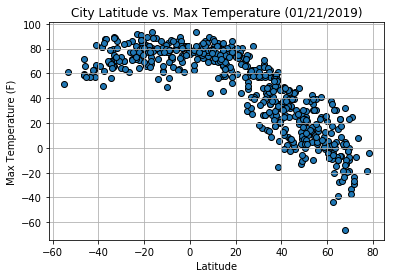

In [15]:
date1 = datetime.fromtimestamp(weather['Date'][0])
date1 = date1.strftime('%m/%d/%Y')
plt.scatter(weather['Lat'],weather['Max Temp'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Max Temperature (' + date1 + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Lat vs Max Temp')
plt.show()

#### Latitude vs. Humidity Plot

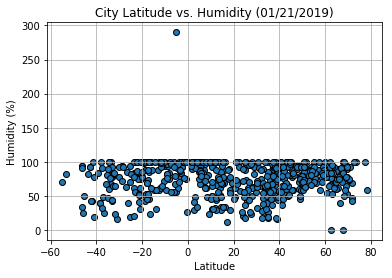

In [16]:
plt.scatter(weather['Lat'],weather['Humidity'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Humidity (' + date1 + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Lat vs Humidity')
plt.show()

In [12]:
weather.loc[weather['Humidity']>100,:]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
515,Paita,0,PE,1548097200,290,-5.09,-81.11,62.6,8.05


#### Latitude vs. Cloudiness Plot

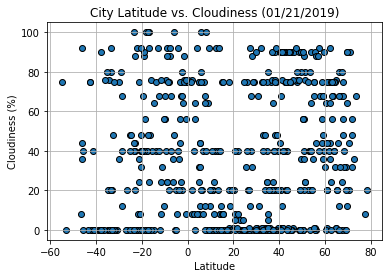

In [17]:
plt.scatter(weather['Lat'],weather['Cloudiness'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Cloudiness (' + date1 + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Lat vs Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

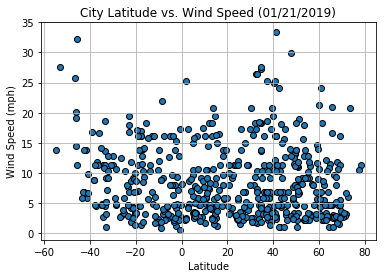

In [14]:
plt.scatter(weather['Lat'],weather['Wind Speed'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Wind Speed (' + date1 + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.
plt.show()

## Analysis

The southern hemisphere is warmer on average than the northern hemisphere, which makes sense because it is summer in the southern hemisphere.

Most humidity percentages are between 50 and 100 percent. There is one data point that has 290 percent humidity. This is an error in the data, as that city has humidity of 57 percent, currently.

The majority of wind speeds are between 0 and 10 mph. Four of the top five highest wind speeds occur in the northern hemisphere.